In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import plothist
import h5py
from offline_step.reader import *

In [2]:
# load_and_plot_hitmap("offline_step/test.h5",event_key="42")  
with h5py.File("offline_step/test.h5", "r") as f:
    print("Top-level keys:", list(f.keys()))
    event = list(f.keys())[0]
    print("Keys inside first event:", list(f[event].keys()))
    print("Shape of 'coords':", f[event]["coords"].shape)
    print("Example values:\n", f[event]["coords"][:5])


Top-level keys: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '6', '7', '8', '9']
Keys inside first event: ['coords', 'counts', 'shape']
Shape of 'coords': (43, 3)
Example values:
 [[  74   84 9146]
 [  74   86 8999]
 [  74   88 8701]
 [  74   88 8718]
 [  74   88 8719]]


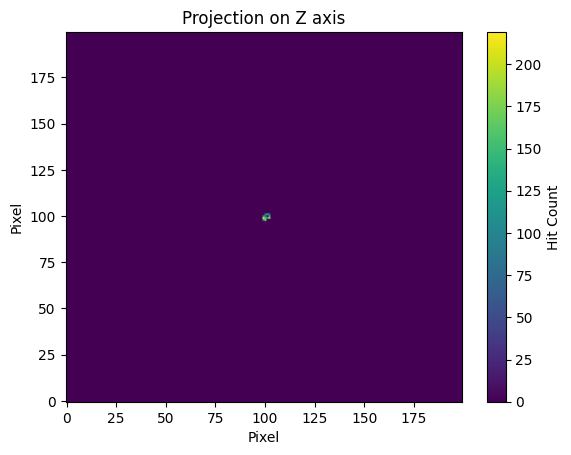

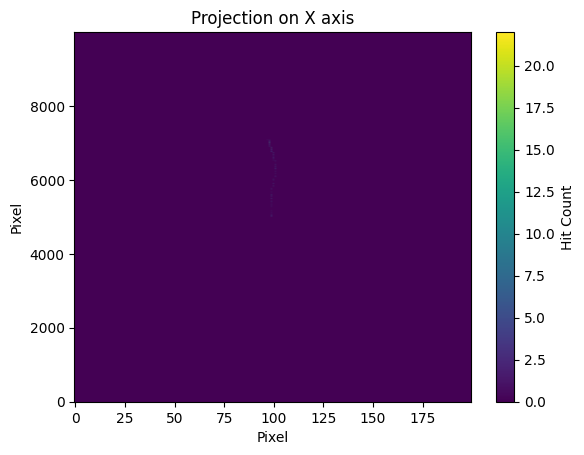

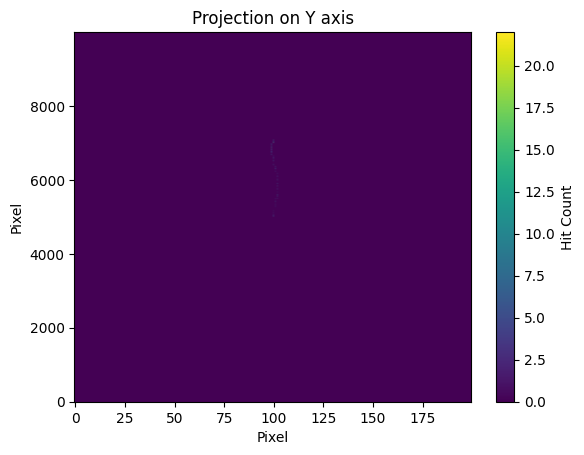

In [6]:
file_path = "offline_step/test.h5"
event_id = 7  # or any ID you have saved

coords, counts, shape = load_sparse_event(file_path, event_id)
hitmap = build_dense_hitmap(coords, counts, shape)

# Plot 2D projections
plot_projection(hitmap, axis='z')  # XY plane
plot_projection(hitmap, axis='x')  # YZ plane
plot_projection(hitmap, axis='y')  # XZ plane

In [2]:
file = uproot.open("build/TPC_pi.root")
tree = file["HitNtuple"]

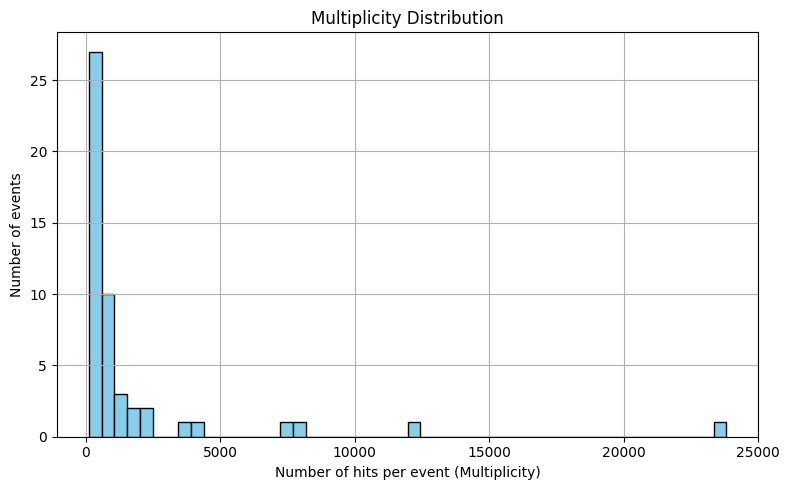

In [24]:
from collections import Counter
# Read EventID branch
event_ids = tree["EventID"].array(library="np")

# Count hits per EventID (i.e., multiplicity)
from collections import Counter
multiplicity = Counter(event_ids)

# Plot histogram of multiplicity
plt.figure(figsize=(8,5))
plt.hist(list(multiplicity.values()), bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Number of hits per event (Multiplicity)")
plt.ylabel("Number of events")
plt.title("Multiplicity Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
variables = [
    "charge", "prePos_x", "prePos_y", "prePos_z",
    "driftTime_notSmeared","StepLength","Gtime","HitPathLength_fromTrack",
    "postPos_x","postPos_y","postPos_z","EventID"                                                                                                                      
]
df = tree.arrays(variables, library="pd")   

0.9378414056809905


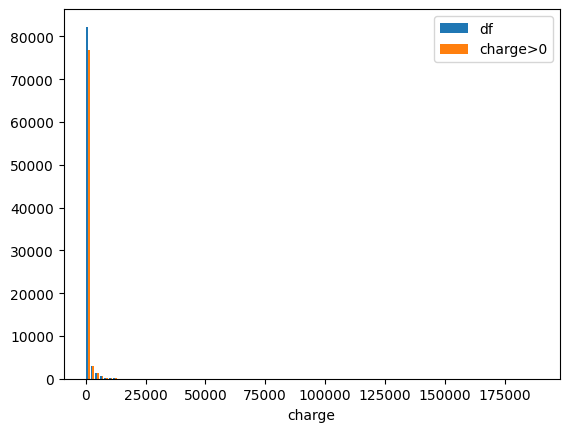

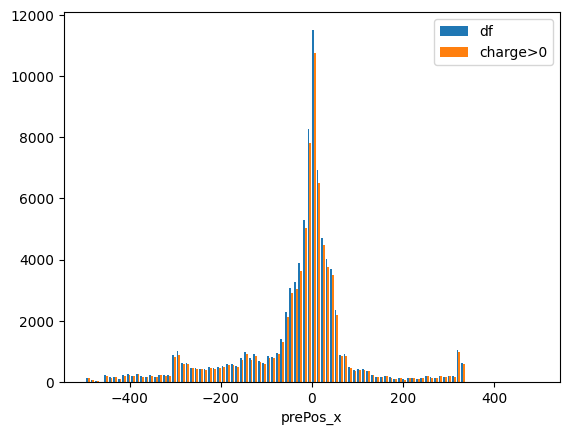

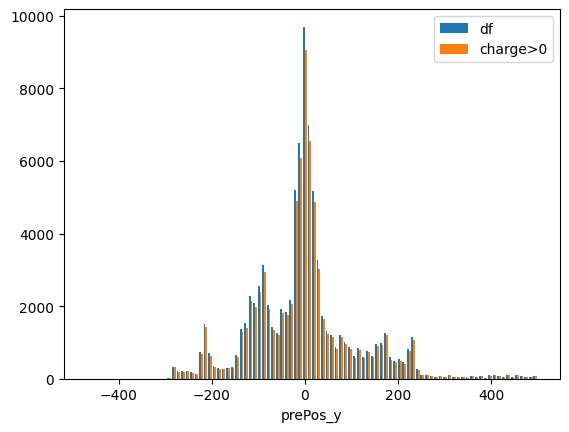

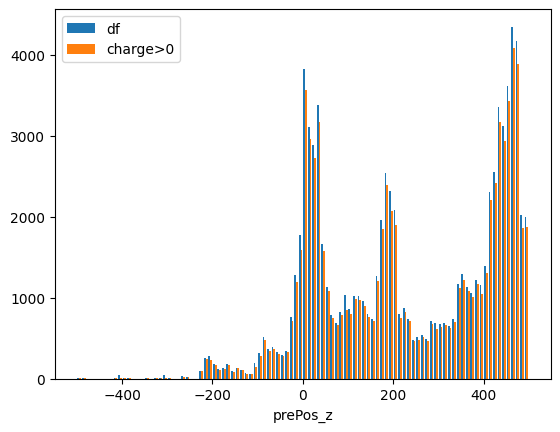

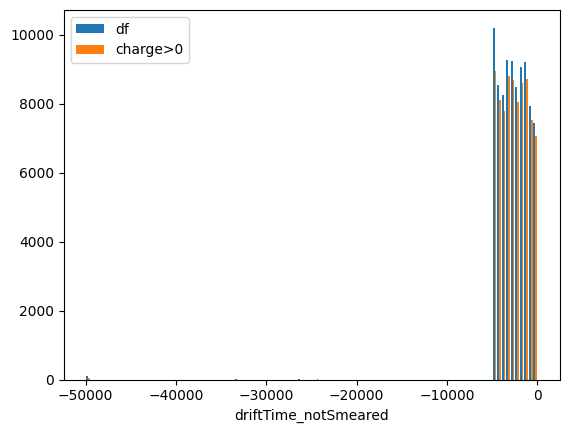

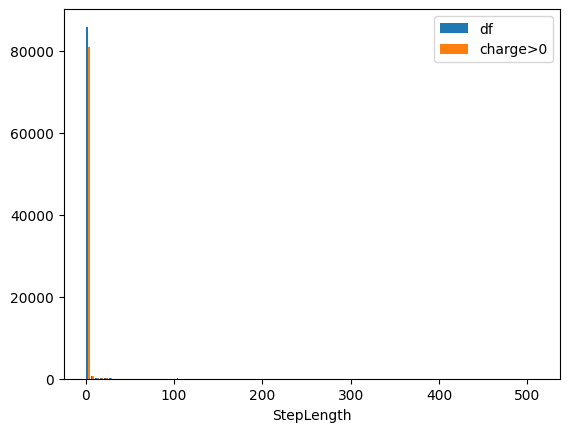

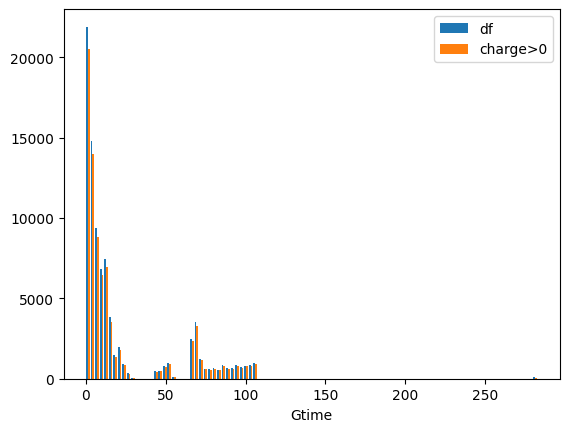

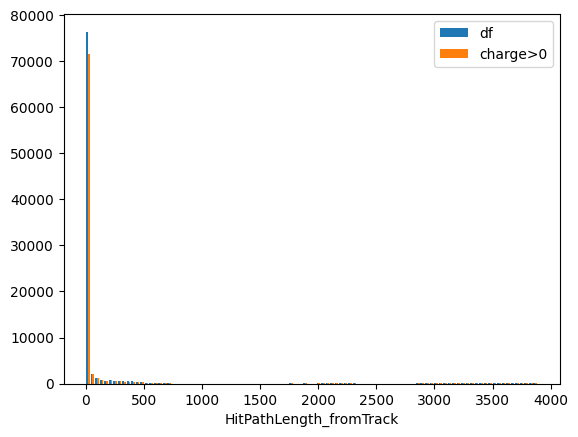

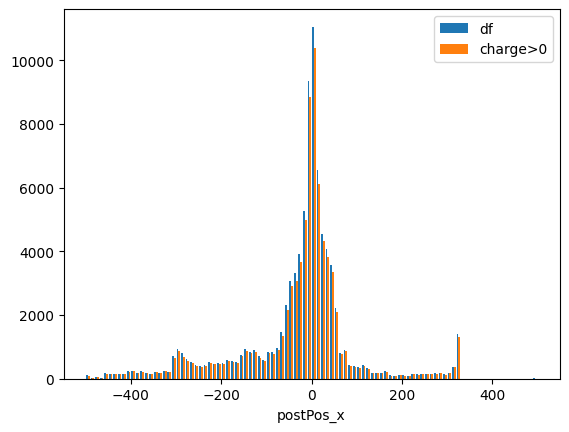

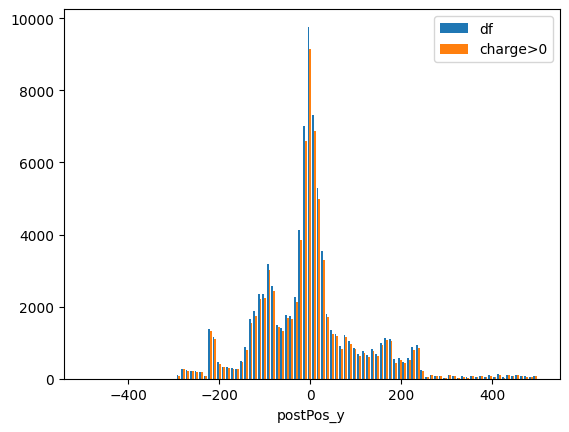

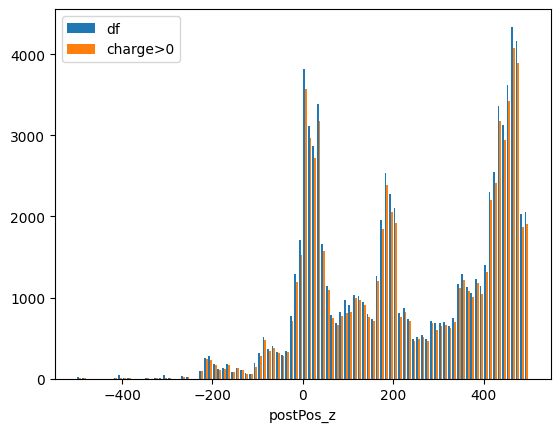

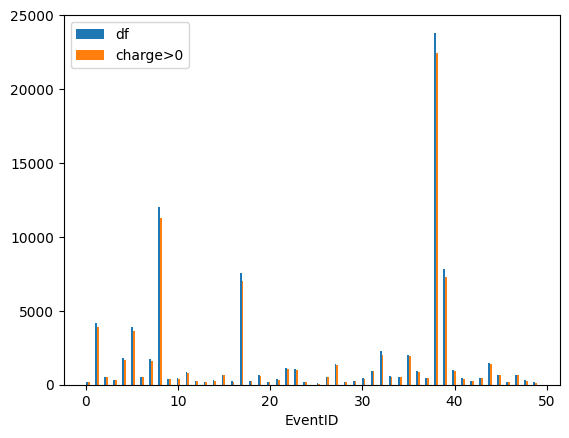

In [23]:
df_p = df.query('charge>0')
print(len(df_p)/len(df)) 
for i in df_p [0:0]:
    plt.figure()
    plt.hist([df[i],df_p[i]],label =['df', 'charge>0'], bins =100)
    plt.xlabel(i)
    plt.legend()
